In [1]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Options d'affichage
pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid")

# 2. Charger les données brutes UNSW
df_train = pd.read_csv("../data/raw/UNSW_NB15_training-set.csv")
df_test = pd.read_csv("../data/raw/UNSW_NB15_testing-set.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

print("Shape:", df.shape)
print("\nLabel distribution:\n", df['label'].value_counts())
print("\nAttack categories:\n", df['attack_cat'].value_counts())

# 3. Aperçu
df.head()


Shape: (257673, 45)

Label distribution:
 label
1    164673
0     93000
Name: count, dtype: int64

Attack categories:
 attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [3]:
# Description numérique
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,257673.0,7.281182e+04,4.892992e+04,1.0,32210.000000,64419.000000,1.109230e+05,1.753410e+05
dur,257673.0,1.246715e+00,5.974305e+00,0.0,0.000008,0.004285,6.857770e-01,5.999999e+01
spkts,257673.0,1.977714e+01,1.359472e+02,1.0,2.000000,4.000000,1.200000e+01,1.064600e+04
dpkts,257673.0,1.851470e+01,1.119860e+02,0.0,0.000000,2.000000,1.000000e+01,1.101800e+04
sbytes,257673.0,8.572952e+03,1.737739e+05,24.0,114.000000,528.000000,1.362000e+03,1.435577e+07
dbytes,257673.0,1.438729e+04,1.461993e+05,0.0,0.000000,178.000000,1.064000e+03,1.465753e+07
rate,257673.0,9.125391e+04,1.603446e+05,0.0,30.789277,2955.664893,1.250000e+05,1.000000e+06
sttl,257673.0,1.800009e+02,1.024883e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,257673.0,8.475496e+01,1.127621e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,257673.0,7.060869e+07,1.857313e+08,0.0,12318.004880,743942.312500,8.000000e+07,5.988000e+09


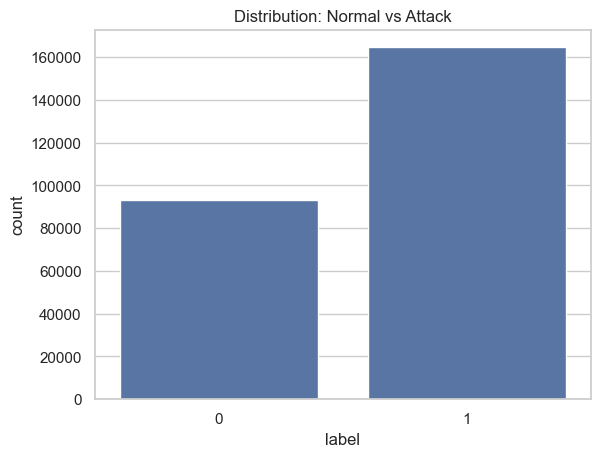

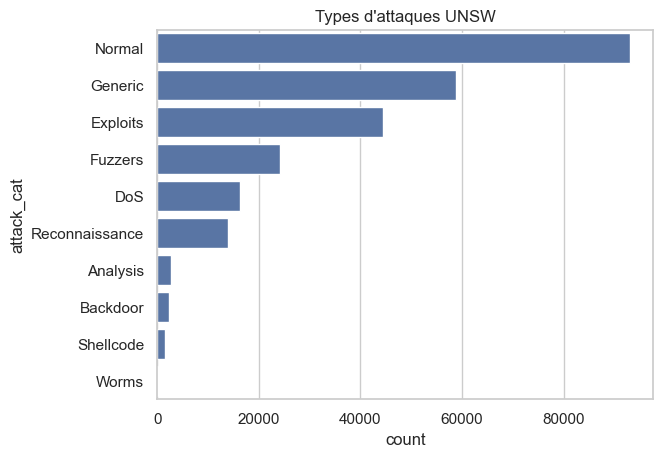

In [4]:
sns.countplot(x="label", data=df)
plt.title("Distribution: Normal vs Attack")
plt.show()

sns.countplot(y="attack_cat", data=df, order=df['attack_cat'].value_counts().index)
plt.title("Types d'attaques UNSW")
plt.show()


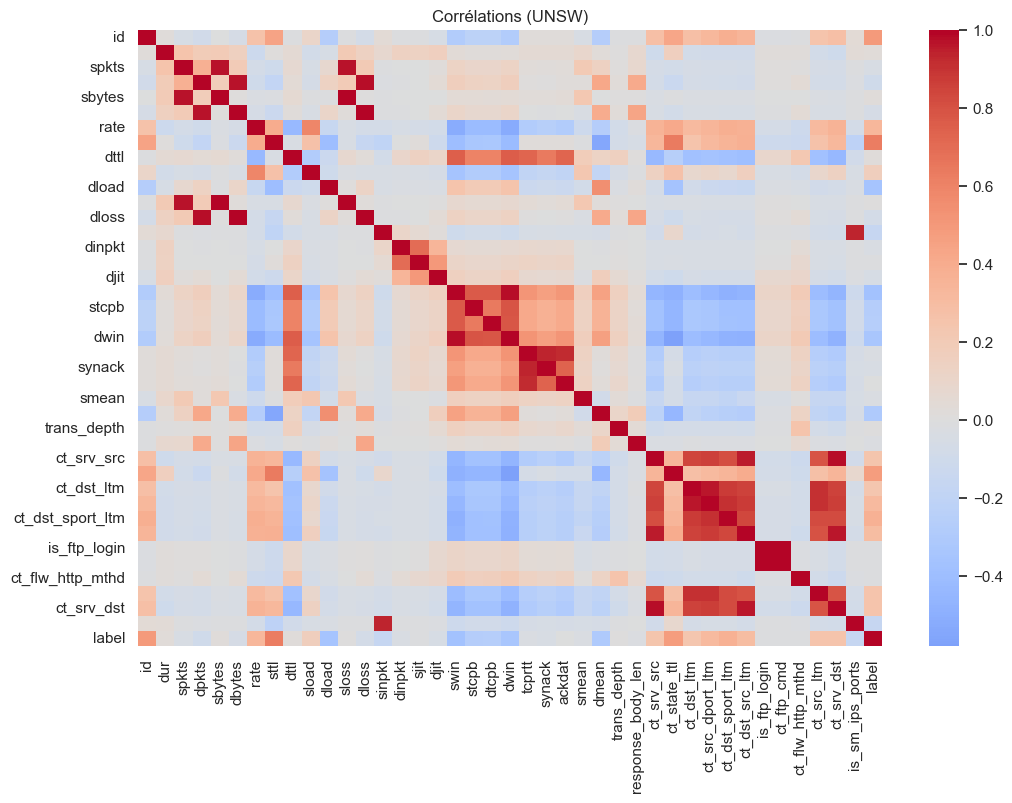

In [5]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Corrélations (UNSW)")
plt.show()


In [11]:
low_var = [col for col in num_cols if df[col].nunique() < 2]
print("Colonnes quasi-constantes:", low_var)


Colonnes quasi-constantes: []
